In [ ]:
# %load K_ex2_3_1.py
# exercise 2.3.1

# Script Description
---
This script loads zipdata.mat. zipdata.mat contains 


## Tags

### Pandas 

* drop
* between
* unique
* describe
* value_counts()
* sort()
* to_dataframe()
* sort_index()
* index.astype()

### Other Python tags

* image data
* load matlab (.mat) data file

## Structure
1. Load .mat data, convert to pandas dataframe and get an overview of data
2. Assign useful and imporant variables
3. Different pandas operations on the data

## About
**Contact Info** 2021 celiacailloux@gmail.com
 
**Exercise Name** exercise 2.3.1 (course 02450 DTU 2018)

---

In [1]:
# import standard modules
from matplotlib.pyplot import figure, plot, xlabel, ylabel, show, bar
from scipy.io import loadmat
from sklearn.neighbors import KNeighborsClassifier
import scipy.linalg as linalg
import numpy as np
import pandas as pd

# 1. Load .mat data, convert to pandas dataframe and get an overview of data

In [2]:
# Load Matlab data file and extract training set and test set
mat_data = loadmat('../Data/zipdata.mat')
mat_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Mon Feb 20 16:18:38 2006',
 '__version__': '1.0',
 '__globals__': [],
 'testdata': array([[ 9., -1., -1., ..., -1., -1., -1.],
        [ 6., -1., -1., ..., -1., -1., -1.],
        [ 3., -1., -1., ..., -1., -1., -1.],
        ...,
        [ 4., -1., -1., ..., -1., -1., -1.],
        [ 0., -1., -1., ..., -1., -1., -1.],
        [ 1., -1., -1., ..., -1., -1., -1.]]),
 'traindata': array([[ 6.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
        [ 5.   , -1.   , -1.   , ..., -0.671, -0.828, -1.   ],
        [ 4.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
        ...,
        [ 3.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
        [ 0.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
        [ 1.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ]])}

In [3]:
# Compute the of the dictionary containing .mat data
mat_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'testdata', 'traindata'])

In [4]:
# Convert to pandas dataframe and add column names
n_cols       = mat_data['testdata'].shape[1]
col_name_y   = ['class']
col_names_X  = ['pixel{}'.format(i) for i in range(1, n_cols)] # 0th column is the y, ie. the class
col_names    = col_name_y + col_names_X               
test_data    = pd.DataFrame(mat_data['testdata'], columns = col_names )
train_data   = pd.DataFrame(mat_data['traindata'], columns = col_names )

In [5]:
test_data.head(5)

,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256
0,9.0,-1.0,-1.0,-1.0,-1.000,-1.0,-0.948,-0.561,0.148,0.384,...,-1.000,-0.908,0.430,0.622,-0.973,-1.000,-1.0,-1.0,-1.0,-1.0
1,6.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
2,3.0,-1.0,-1.0,-1.0,-0.593,0.7,1.000,1.000,1.000,1.000,...,1.000,0.717,0.333,0.162,-0.393,-1.000,-1.0,-1.0,-1.0,-1.0
3,6.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
4,6.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-0.858,-0.106,...,0.901,0.901,0.901,0.290,-0.369,-0.867,-1.0,-1.0,-1.0,-1.0


In [43]:
train_data.head(5)

,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0


In [49]:
train_data.describe()

,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256
count,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,...,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000
mean,3.903443,-0.996417,-0.981138,-0.951153,-0.887738,-0.773468,-0.610302,-0.368991,-0.045769,-0.052641,...,-0.198547,0.139823,0.116439,-0.314108,-0.653711,-0.837858,-0.922194,-0.957393,-0.979290,-0.994678
std,2.996386,0.051713,0.151202,0.244264,0.360516,0.502659,0.628710,0.716032,0.768304,0.752979,...,0.772895,0.752984,0.757336,0.725859,0.582555,0.414646,0.300830,0.228700,0.158998,0.066056
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.999000,-0.950000,...,-1.000000,-0.661500,-0.738000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,4.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.719000,0.061000,0.002000,...,-0.353000,0.368000,0.336000,-0.579000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,7.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.962000,-0.391000,0.254500,0.696000,0.674500,...,0.554000,0.835000,0.815000,0.346000,-0.504500,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
max,9.000000,0.638000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.592000


In [50]:
test_data.describe()

,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256
count,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,...,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000
mean,3.850523,-0.996595,-0.977925,-0.949133,-0.882643,-0.771821,-0.589944,-0.353905,-0.061801,-0.076219,...,-0.170607,0.133865,0.110366,-0.314661,-0.636191,-0.817464,-0.912635,-0.960662,-0.984057,-0.995801
std,3.018484,0.042205,0.168974,0.245463,0.368629,0.499981,0.646510,0.730745,0.773948,0.764625,...,0.790514,0.760779,0.756387,0.717573,0.592921,0.451498,0.316113,0.220893,0.130031,0.055080
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.997000,...,-1.000000,-0.684500,-0.746000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,4.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.714000,0.035000,-0.043000,...,-0.337000,0.333000,0.333000,-0.577000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,6.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.941500,-0.306000,0.308000,0.704500,0.670000,...,0.641500,0.853000,0.805000,0.335000,-0.435500,-0.999000,-1.000000,-1.000000,-1.000000,-1.000000
max,9.000000,-0.130000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.992000,0.563000


# 2. Assign useful and imporant variables

In [7]:
# Assign X by dropping the first column
# axis=1 referes to it dropping a column (ie. axis=0 is dropping a row)
# inplace=True means that it works of the original df
X_train = train_data.drop('class', axis = 1) 
y_train = train_data[['class']] # importan to use double []
X_test = test_data.drop('class', axis = 1)
y_test = test_data[['class']]
N_train, M_train = X_train.shape
N_test, Mtest = X_test.shape

In [8]:
X_train.head(5)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256
0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,-0.167,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,-1.000,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.996,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,-0.067,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,0.234,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0


In [9]:
y_train.head()

,class
0,6.0
1,5.0
2,4.0
3,7.0
4,3.0


# 3. Different pandas operations on the data

In [219]:
# show only classes between i and j
i = 0
j = 9
test_between = train_data[train_data['class'].between(i,j)]
test_between.head()

,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0


In [220]:
# Returns the uniques without sorting is
uniques = test_between['class'].unique()
uniques.sort()  # uncomment to sort
uniques

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [221]:
# Count how many times you the unique values in 'class' apears
unique_counts = test_between['class'].value_counts().to_frame('counts')
# unique_counts.index.name = 'class'
unique_counts.sort_index(inplace = True)
unique_counts['class'] = unique_counts.index.astype('int32')

In [222]:
unique_counts

,counts,class
0.0,1194,0
1.0,1005,1
2.0,731,2
3.0,658,3
4.0,652,4
5.0,556,5
6.0,664,6
7.0,645,7
8.0,542,8
9.0,644,9


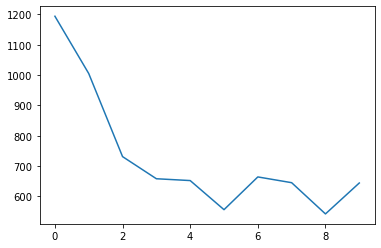

In [223]:
plot(unique_counts['class'], unique_counts['counts'])

In [224]:
# unique_counts.index

## Return all digits values that appear less than 600 times

In [225]:
# find "anomaly" find that class, where the counts are less than 600
[_class for _class in unique_counts.index if len(test_between[test_between['class'] == _class]) <= 600]

[5.0, 8.0]

## Visualize Data to get acquainted with it